In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from typing import List
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
import plotly.graph_objects as go
from sklearn.datasets import make_blobs
from bokeh.io import show
import plotly.graph_objects as go
import panel as pn
import openpyxl

## Filtering

In [28]:
df = pd.read_csv('propertyGuru_completed.csv',index_col=0)
property_types = ["Condominium", "Apartment", '4NG (New Generation) HDB','4A HDB','5I HDB']
df = df[df['PropertyType'].isin(property_types)].reset_index(drop=True)
df = df[df['NumberOfBeds'] != "Room"].reset_index(drop=True)

## Dimensionality Reduction

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, preprocessing, model_selection, pipeline, ensemble, tree, datasets, cluster
sns.set(style = 'white', font_scale = 1.4)######## Load the Data
features = ['DistanceFromMRT','NumberOfBeds','NumberOfBaths','Size','PropertyType','Floor Level','Furnished']
mappings = {'Floor Level':{'Ground Floor': 1,'Low Floor':2,'Middle Floor': 3, 'High Floor': 4,'Penthouse': 5},
           'PropertyType':{'4NG (New Generation) HDB':1,'4A HDB': 2,'5I HDB':3,'Apartment':4,'Condominium':5},
           'Furnished':{"Unfurnished":1,"Partially Furnished": 2, "Fully Furnished": 3}}
for column,mapping in mappings.items():
    if column in df.columns:
        df[column] = df[column].map(mapping)
df.to_csv('test.csv')
df1 = df[features]
# Scale data before applying PCA
scaling=StandardScaler()
 
# # Use fit and transform method 
# scaling.fit(df1)
# Scaled_data=scaling.transform(df1)
# principal=PCA(n_components=2)
# principal.fit(Scaled_data)
# x=principal.transform(Scaled_data)
# df['Merged_Feature1'] = x[:, 0]
# df['Merged_Feature2'] = x[:,1]
# scaler = MinMaxScaler()
# df['Merged_Feature1'] = scaler.fit_transform(df['Merged_Feature1'].values.reshape(-1, 1))
# df['Merged_Feature2'] = scaler.fit_transform(df['Merged_Feature2'].values.reshape(-1, 1))
# df['Price'] = scaler.fit_transform(df['Price'].values.reshape(-1, 1))

# For PCA =1 
scaling.fit(df1)
Scaled_data=scaling.transform(df1)
principal=PCA(n_components=1)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
df['Merged_Feature1'] = x[:, 0]
scaler = MinMaxScaler()
df['Merged_Feature1'] = scaler.fit_transform(df['Merged_Feature1'].values.reshape(-1, 1))
df['Price'] = scaler.fit_transform(df['Price'].values.reshape(-1, 1))
x = df['Price'].to_list()
y = df['Merged_Feature1'].to_list()

,ListID,Title,Price,MRT,Address,Amenities,Other Data,DistanceFromMRT,NearestMRT,NumberOfBeds,NumberOfBaths,Furnished,Size,PropertyType,Floor Level,PSF,Tenure,Merged_Feature1
0,25202712.0,Meyer Mansion,0.075841,8 mins (630 m) from TE24 Katong Park MRT,79 Meyer Road East Coast / Marine Parade (D15),"['3 bed', '2 bath', '1,109 sqft', 'Partially F...","{'Property Type': 'Condominium For Rent', 'Flo...",630.0,TE24 Katong Park,3,2,2,1109,5,4,7.21,Freehold,0.202122
1,25322701.0,749 Jurong West Street 73,0.045203,1 min (30 m) from JW1 Gek Poh MRT,749 Jurong West Street 73 Boon Lay / Jurong / ...,"['4 bed', '2 bath', '1,313 sqft', 'Fully Furni...","{'Property Type': '5I HDB For Rent', 'Floor Si...",30.0,JW1 Gek Poh,4,2,3,1313,3,3,3.77,99-year Leasehold,0.189782
2,25226930.0,112 Bishan Street 12,0.036163,9 mins (730 m) from NS17/CC15 Bishan MRT,112 Bishan Street 12 Ang Mo Kio / Bishan / Tho...,"['3 bed', '2 bath', '1,130 sqft', 'Fully Furni...","{'Property Type': '4A HDB For Rent', 'Floor Si...",730.0,NS17/CC15 Bishan,3,2,3,1130,2,4,3.58,99-year Leasehold,0.165847
3,19207068.0,Aspen Heights,0.146158,14 mins (1.2 km) from DT20 Fort Canning MRT,261 River Valley Road Orchard / River Valley (...,"['5 bed', '4 bath', '2,700 sqft', 'Partially F...","{'Property Type': 'Condominium For Rent', 'Flo...",1200.0,DT20 Fort Canning,5,4,2,2700,5,5,5.56,999-year Leasehold,0.431404
4,24743110.0,The Tre Ver,0.040683,9 mins (760 m) from NE10 Potong Pasir MRT,68 Potong Pasir Avenue 1 Macpherson / Potong P...,"['2 bed', '2 bath', '700 sqft', 'Partially Fur...","{'Property Type': 'Condominium For Rent', 'Flo...",760.0,NE10 Potong Pasir,2,2,2,700,5,4,6.43,99-year Leasehold,0.152440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10950,25107062.0,Rich East Garden,0.065796,10 mins (790 m) from TE29 Bayshore MRT,302 Upper East Coast Road Bedok / Upper East C...,"['3 bed', '3 bath', '2,303 sqft', 'Unfurnished']","{'Property Type': 'Condominium For Rent', 'Flo...",790.0,TE29 Bayshore,3,3,1,2303,5,1,3.04,Freehold,0.302180
10951,24623132.0,Hillcrest Arcadia,0.064792,24 mins (2 km) from DT8 Tan Kah Kee MRT,255 Arcadia Road Newton / Novena (D11),"['3 bed', '3 bath', '1,798 sqft', 'Partially F...","{'Property Type': 'Condominium For Rent', 'Flo...",2000.0,DT8 Tan Kah Kee,3,3,2,1798,5,4,3.84,99-year Leasehold,0.300844
10952,25305073.0,Double Bay Residences,0.020593,7 mins (560 m) from EW3 Simei MRT,17 Simei Street 4 Pasir Ris / Tampines (D18),"['1 bed', '1 bath', '350 sqft', 'Fully Furnish...","{'Property Type': 'Condominium For Rent', 'Flo...",560.0,EW3 Simei,1,1,3,350,5,3,7.14,99-year Leasehold,0.025306
10953,25316743.0,The Armadale,0.039679,8 mins (690 m) from NS20 Novena MRT,60 Gilstead Road Newton / Novena (D11),"['2 bed', '1 bath', '1,184 sqft', 'Partially F...","{'Property Type': 'Condominium For Rent', 'Flo...",690.0,NS20 Novena,2,1,2,1184,5,5,3.72,Freehold,0.138966


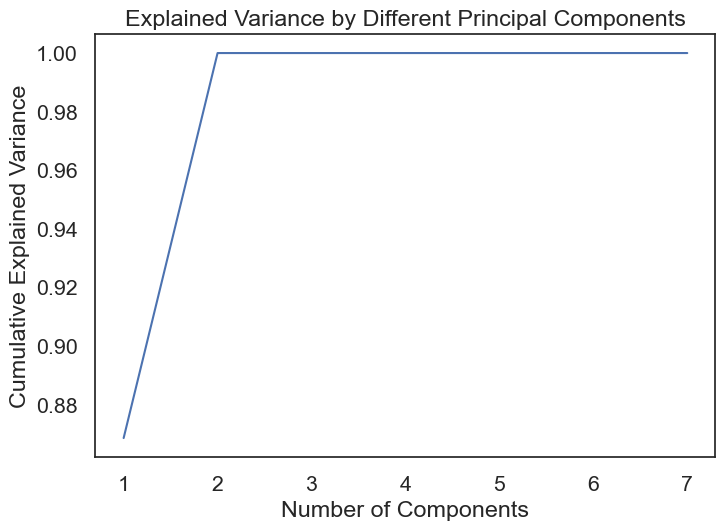

Optimal number of components: 2


In [5]:
pca = PCA()
pca.fit(df[features])

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Elbow method
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum())
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Different Principal Components")
plt.show()

# Variance explained threshold
threshold = 0.95
num_components = np.where(explained_variance_ratio.cumsum() >= threshold)[0][0] + 1
print("Optimal number of components:", num_components)

In [7]:
price = df['Price'].to_list()
features = df['Merged_Feature1'].to_list()
features2 = df['Merged_Feature2'].to_list()
data = list(zip(price,features,features2))
# data = df[['Price', 'Merged_Feature1', 'Merged_Feature2']].values

In [8]:
# Create a 3D scatter plot using Plotly
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
labels = kmeans.labels_
fig = go.Figure(data=[go.Scatter3d(x=df['Price'].to_list(), y=df['Merged_Feature1'].to_list(), z=df['Merged_Feature2'].to_list(), mode='markers',  # Show both markers and labels
    marker=dict(size=6, color=labels, colorscale='Viridis', opacity=0.8),  # Color by cluster 
    textposition="top center")])

# Set the layout for better visualization (optional)
fig.update_layout(
    scene=dict(
        xaxis_title='Price',
        yaxis_title='Feature 1',
        zaxis_title='Feature 2'
    ),
    title="3D Scatter Plot of Price vs Features (Normalised)"
)

# Use Panel to display the Plotly figure inside a Bokeh-compatible layout
bokeh_layout = pn.panel(fig).servable()

# Display the plot
bokeh_layout.show()

Launching server at http://localhost:63656


In [39]:
def drawKMeansElbow(data) -> None:
    inertias = []

    for i in range(1,11):
        kmeans = KMeans(n_clusters=i,)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    plt.plot(range(1,11), inertias, marker='o')
    plt.title('KMeans Elbow')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show() 

def plotKMeansPoints(data, cluster: int) -> None:
    data = list(zip(x,y))
    plt.title('Spread of Price vs Features')
    plt.xlabel('Price')
    plt.ylabel('Features (Normalised)')
    kmeans = KMeans(n_clusters=cluster,init='random')
    kmeans.fit(data)
    plt.scatter(x, y, c=kmeans.labels_)
    plt.show()

# Finding epsilon for DBscan
def find_optimal_epsilon(data, k=10):
    """
    Finds the optimal epsilon value for DBSCAN using the k-distance graph method.

    Args:
        data: The input data as a NumPy array.
        k: The number of neighbors to consider.

    Returns:
        The optimal epsilon value.
    """

    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors.fit(data)
    distances, _ = neighbors.kneighbors(data)

    distances = np.sort(distances[:, k - 1])
    plt.plot(distances)
    plt.xlabel("Points")
    plt.ylabel("Distance")
    plt.show()

In [47]:
df.to_excel('test.xlsx')

# K Means



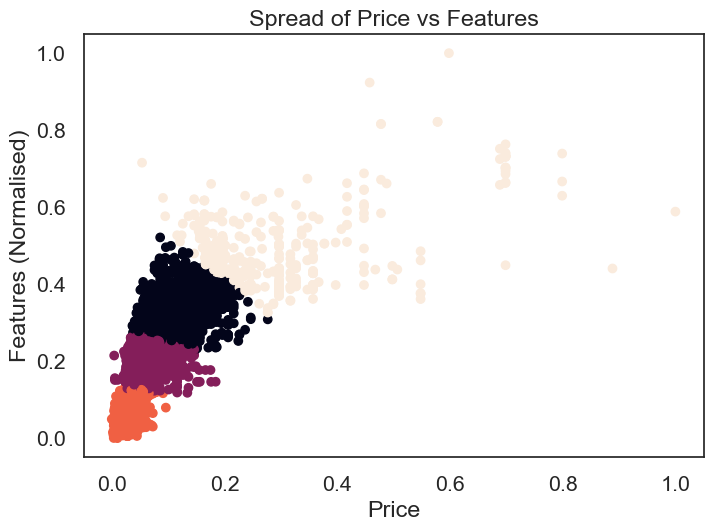

In [41]:
# drawKMeansElbow(data)
# print('-------------------------------------------------------------------------------------------------')
plotKMeansPoints(data,4)

# DBSCAN



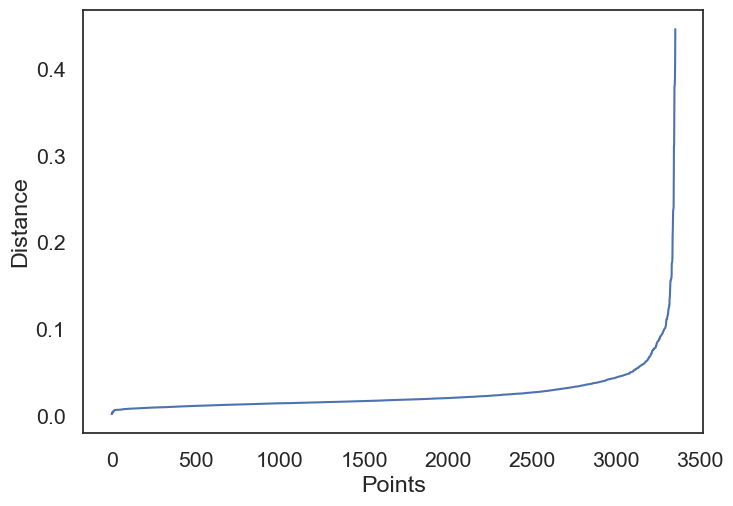

In [19]:
find_optimal_epsilon(data)

In [31]:
data = np.array(data)
dbscan = DBSCAN(eps=0.06, min_samples=4)
labels = dbscan.fit_predict(data)

fig = go.Figure(data=[go.Scatter3d(x=df['Price'].to_list(), y=df['Merged_Feature1'].to_list(), z=df['Merged_Feature2'].to_list(), mode='markers',  # Show both markers and labels
    marker=dict(size=5, color=labels, colorscale='Viridis', opacity=0.8),  # Color by cluster 
    textposition="top center")])

# Set the layout for better visualization (optional)
fig.update_layout(
    scene=dict(
        xaxis_title='Price',
        yaxis_title='Feature 1',
        zaxis_title='Feature 2'
    ),
    title="3D Scatter Plot of Price vs Features (Normalised)"
)

# Use Panel to display the Plotly figure inside a Bokeh-compatible layout
bokeh_layout = pn.panel(fig).servable()

# Display the plot
bokeh_layout.show()
# unique_labels = set(labels)
# colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
# for k, col in zip(unique_labels, colors):
#     if k == -1:
#         col = [0, 0, 0, 1]  # Black color for noise points (label=-1)
#     class_member_mask = (labels == k)
#     xy = data[class_member_mask]
#     plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker='o', alpha=0.5)

# plt.title('DBSCAN Clustering')
# plt.show()

Launching server at http://localhost:56006
